<a href="https://colab.research.google.com/github/chaihermes/bag_of_words/blob/main/Bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")
avaliacoes.head()

original_index                                        review_text  \
0           11955  Bem macio e felpudo...recomendo.  Preço imbatí...   
1           35478  Produto excepcional!  recomendo!!! inovador e ...   
2          122760  recebi o produto antes do prazo mas veio com d...   
3           17114  Bom custo beneficio. Adequado para pessoas que...   
4           19112  Além de higiênico tem o tamanho ideal. Só falt...   

                               review_text_processed  \
0  bem macio e felpudo...recomendo.  preco imbati...   
1  produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  bom custo beneficio. adequado para pessoas que...   
4  alem de higienico tem o tamanho ideal. so falt...   

                               review_text_tokenized  polarity  rating  \
0  ['bem', 'macio', 'felpudo', 'recomendo', 'prec...       1.0       4   
1  ['produto', 'excepcional', 'recomendo', 'inova...       1.0       5   
2  ['recebi', 'produto', 'antes', 'do', 'prazo', ...       0.0       1   
3  ['bom', 'custo', 'beneficio', 'adequado', 'par...       1.0       5   
4  ['alem', 'de', 'higienico', 'tem', 'tamanho', ...       NaN       3   

   kfold_polarity  kfold_rating  
0               1             1  
1               1             1  
2               1             1  
3               1             1  
4              -1             1

In [ ]:
# Limpeza das colunas desnecessárias
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)
avaliacoes.head()

review_text  polarity
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1  Produto excepcional!  recomendo!!! inovador e ...       1.0
2  recebi o produto antes do prazo mas veio com d...       0.0
3  Bom custo beneficio. Adequado para pessoas que...       1.0
4  Além de higiênico tem o tamanho ideal. Só falt...       NaN

In [ ]:
# Retiramos os registros com dados NaN e visualizamos novamente
avaliacoes.dropna(inplace=True, axis=0)       # o inplace significa que as mudanças já serão implementadas na variável e já serão salvas
avaliacoes

review_text  polarity
0       Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1       Produto excepcional!  recomendo!!! inovador e ...       1.0
2       recebi o produto antes do prazo mas veio com d...       0.0
3       Bom custo beneficio. Adequado para pessoas que...       1.0
5       ótmo produto atendeu as expectativas, a entreg...       1.0
...                                                   ...       ...
132367  Ótimo jogo, um dos melhores que joguei. Entreg...       1.0
132368  SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...       1.0
132369  Eu estou muito chateado com isso gostaria que ...       0.0
132371  O produto anunciado no site dizia ser  100% al...       0.0
132372  Não recebi o produto e consta como entregue no...       0.0

[116058 rows x 2 columns]

In [ ]:
# Observamos a quantidade de dados de cada tipo de polaridade
avaliacoes.polarity.value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [ ]:
# Separamos os dados em treino e teste (lembrando do parâmetro stratify que observa a desigualdade entre os dados)
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state = 71)

In [ ]:
# Nessa célula fizemos a tentativa de treinar o modelo, mas sem sucesso, pois o computador não entende os dados
# da maneira que estão, por isso está comentado e só está importando a biblioteca LogisticRegression para usarmos posteriormente.
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

In [ ]:
# Começamos a entender como funciona o bag of words com este código
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", "Este produto é muito ruim"]
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
bag_of_words      # devolve uma matriz esparsa

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
# Definição da matriz esparsa
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
  columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

bom  este  muito  produto  ruim
0    1     1      1        1     0
1    0     1      1        1     1

In [ ]:
# Vetorizamos e definimos a quantidade de colunas com dados mais recorrentes que foram usados no modelo
vetorizar = CountVectorizer(max_features=100)     # 100 palavras únicas mais recorrentes
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [ ]:
#from sklearn.linear_model import LogisticRegression

#treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
 #                                                             avaliacoes.polarity,
  #                                                            stratify=avaliacoes.polarity,
   #                                                           random_state=71)

#regressao_logistica = LogisticRegression()
#regressao_logistica.fit(treino, classe_treino)
#acuracia = regressao_logistica.score(teste, classe_teste)
#print(acuracia)

In [ ]:
# Criamos um método para criar e testar o modelo, lembrando que o parâmetro random_state
# é para garantir a reprodutibilidade dos treinos e obtermos os mesmos resultadosdef treinar_modelo(dados, coluna_texto, coluna_sentimento):
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                avaliacoes[coluna_sentimento],
                                                                stratify=avaliacoes[coluna_sentimento],
                                                                random_state = 71)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [ ]:
# Printamos a acurácia do modelo
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8870239531276926


In [ ]:
# Aqui nós importamos o Word Cloud e separamos as frases em um array e depois juntamos
# tudo em uma string separada por espaço, criando uma sstring com todas as palavras do nosso corpus textual
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

In [ ]:
len(todas_avaliacoes)

116058

In [ ]:
len(todas_palavras)

16570763

In [ ]:
# Criamos a nossa word cloud com a variável nuvem_palavras e definimos o parâmtero collocations como
# false para evitar Ngrams que sçao conjuntos de palavras, como por exemplo:
# "o produto", "não recebei", "muito bom", "muito ruim", etc
nuvem_palavras = WordCloud(width=800, height=500,
  max_font_size=110,
  collocations=False).generate(todas_palavras)

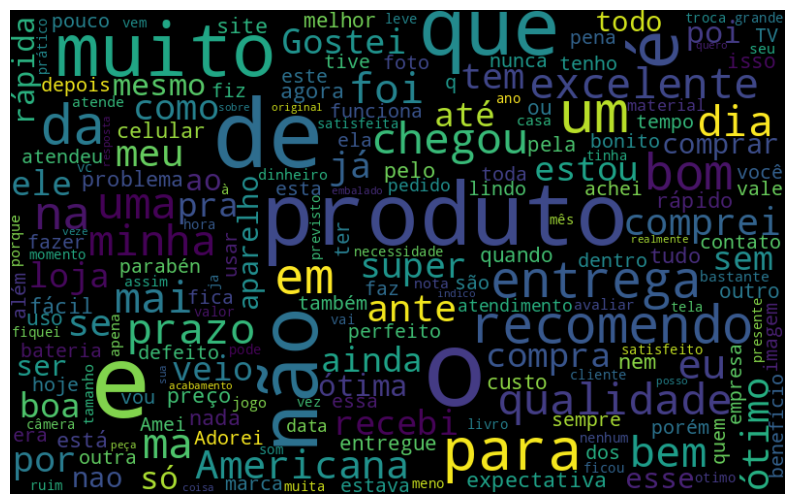

In [ ]:
# Plotamos nosso gráfico da word cloud com todas as palavras juntas
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')      # interpolation deixa a imagem mais nítida
plt.axis("off")
plt.show()

In [ ]:
# Entendemos como filtrar dados dentro de um dataframe da biblioteca pandas
avaliacoes.query("polarity == 1")

review_text  polarity
0       Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1       Produto excepcional!  recomendo!!! inovador e ...       1.0
3       Bom custo beneficio. Adequado para pessoas que...       1.0
5       ótmo produto atendeu as expectativas, a entreg...       1.0
6       GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...       1.0
...                                                   ...       ...
132362  toalhas do ótima qualidade e macias. Atendeu p...       1.0
132363  O TELEVISOR É LINDO E UMA QUALIDADE DE IMAGEM ...       1.0
132364  Tudo de  bom, produto de primeira linha, goste...       1.0
132367  Ótimo jogo, um dos melhores que joguei. Entreg...       1.0
132368  SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...       1.0

[80300 rows x 2 columns]

In [ ]:
# Criamos um método para criar a word cloud com palavras das sentenças negativas do nosso dataset
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)

  nuvem_palavras = WordCloud(width=800, height=500,
                             max_font_size=110,
                             collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
# E criamos para a word cloud de palavras das sentenças positivas do nosso dataset
def word_cloud_pos(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)

  nuvem_palavras = WordCloud(width=800, height=500,
                             max_font_size=110,
                             collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

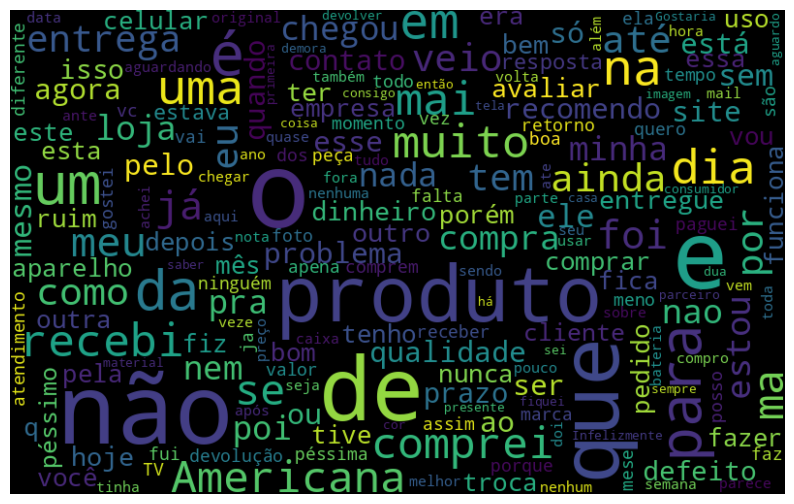

In [ ]:
word_cloud_neg(avaliacoes, "review_text")

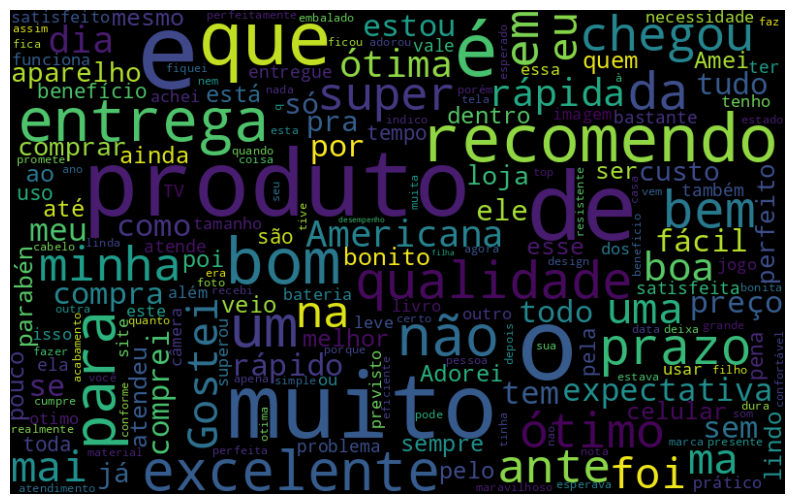

In [ ]:
# Por fim, plotamos o gráfico com as palavras de sentenças positivas
word_cloud_pos(avaliacoes, "review_text")

# NLTK

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
import nltk

corpus = ["Muito bom este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom este produto': 1, 'Muito ruim este produto': 1})

In [ ]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaço = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaço.tokenize(frase)
token_frase

['Muito', 'bom', 'este', 'produto']

In [ ]:
token_por_espaço = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [ ]:
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})

In [ ]:
dataframe_frequencia.head()

Palavra  Frequencia
0                   Bem         413
1                 macio         216
2                     e       89308
3  felpudo...recomendo.           1
4                 Preço         334

In [ ]:
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

Palavra  Frequencia
2         e       89308
20        o       76053
17       de       75791
39        a       66640
50      que       53574
33      não       44253
23       do       36776
43    muito       36566
60        é       36314
21  produto       34983

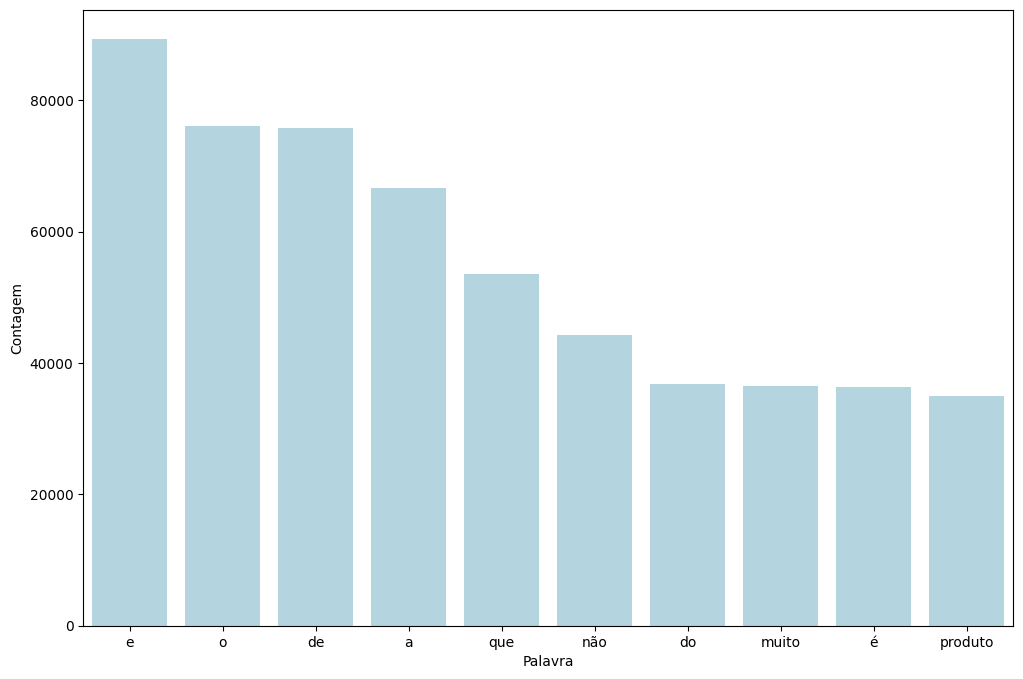

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns = "Frequencia", n = 10),
                 x = "Palavra", y = "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [ ]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaço.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns = "Frequencia",
                                                       n = quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = dataframe_frequencia,
                  x = "Palavra", y = "Frequencia", color = "lightblue")
  ax.set(ylabel = "Contagem")
  plt.show()

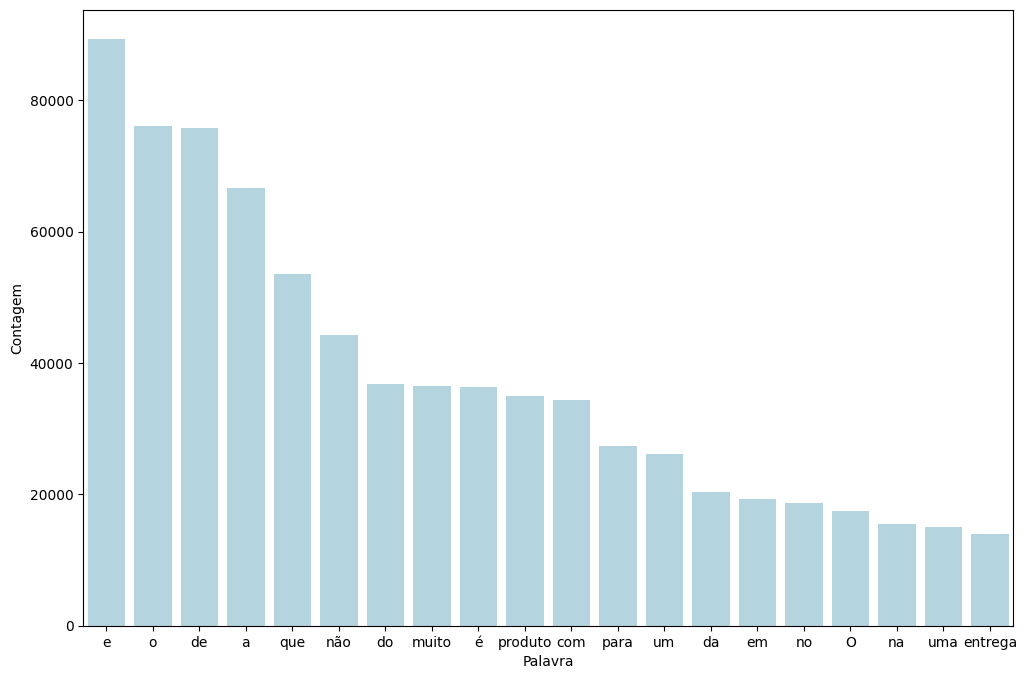

In [ ]:
grafico(avaliacoes, "review_text", 20)

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [ ]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
frase_processada = list()

for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords"] = frase_processada      # Cria uma nova coluna pra não mexer no texto original

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  
0  Bem macio felpudo...recomendo. Preço imbatível...  
1  Produto excepcional! recomendo!!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio. Adequado pessoas fazem us...  
5  ótmo produto atendeu expectativas, entrega oco...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords", "polarity")

0.8790970187833879

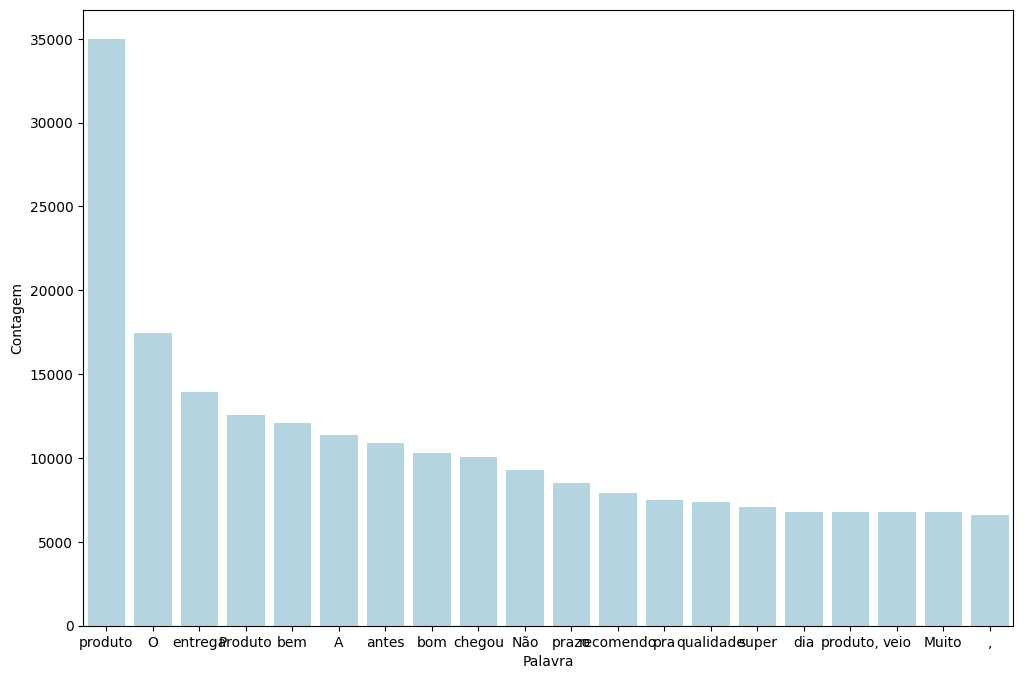

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords", 20)

In [ ]:
from nltk import tokenize

frase = "Muito bom, este produto."

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pontuacao = list()

for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  
0  Bem macio felpudo ... recomendo Preço imbatíve...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  ótmo produto atendeu expectativas entrega ocor...

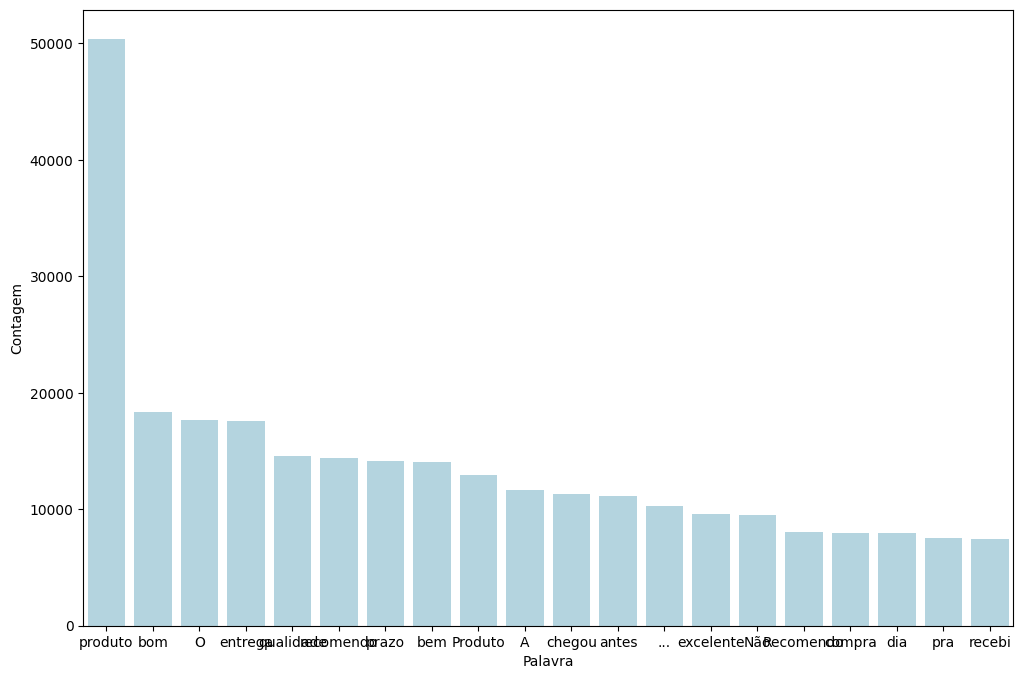

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 20)

In [ ]:
!pip install unidecode

In [ ]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = sem_acentos


frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  
0  Bem macio felpudo ... recomendo Preco imbative...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  otmo produto atendeu expectativas entrega ocor...

In [ ]:
print(treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos", "polarity"))

0.8825090470446321


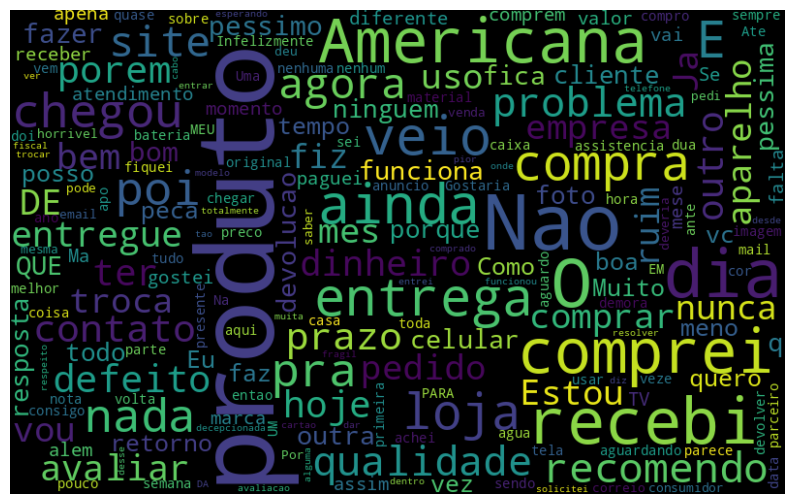

In [ ]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

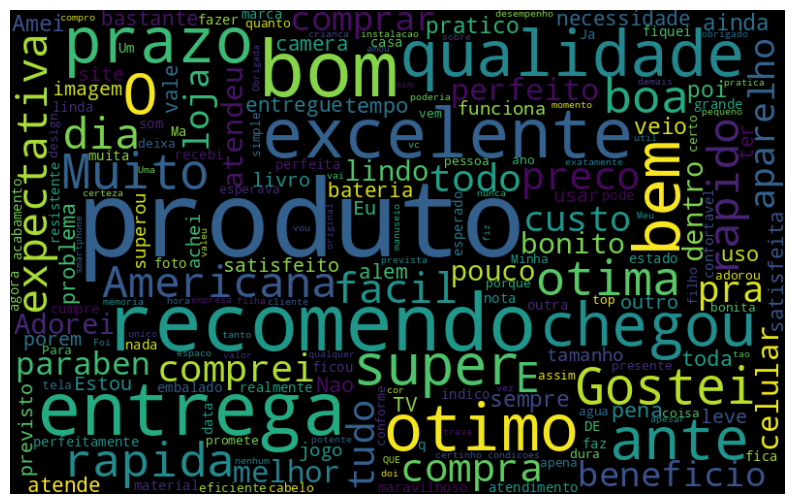

In [ ]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()     # deixa todas as maiúsculas em minúsculas
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos_minusculo"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

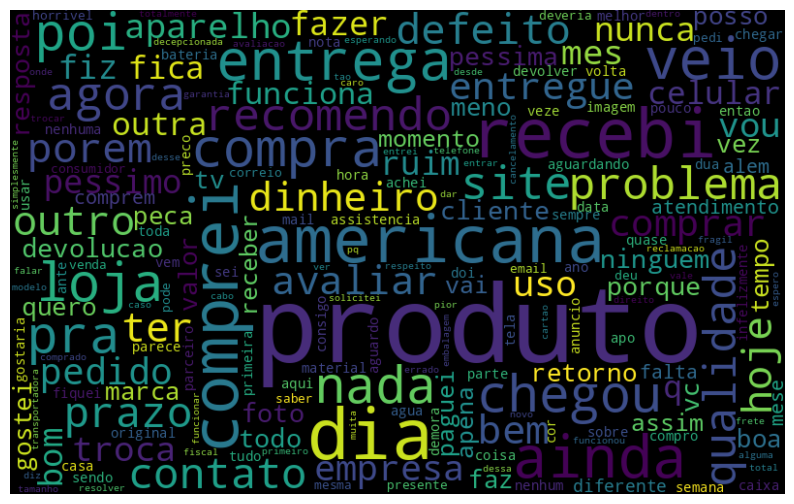

In [ ]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

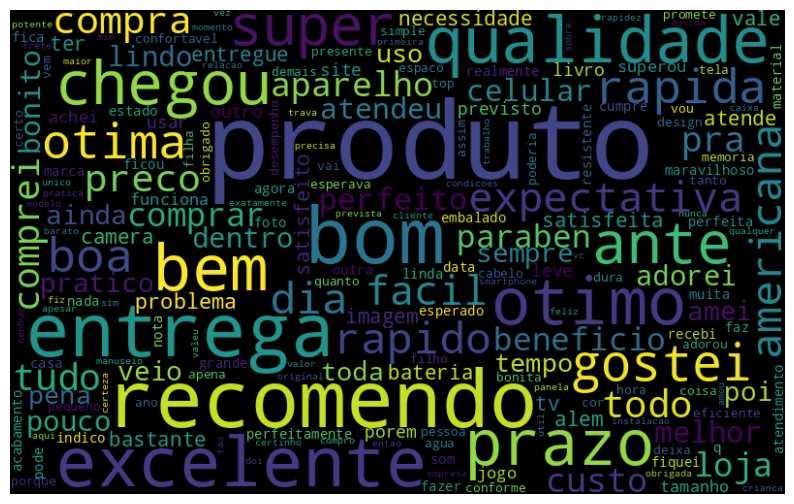

In [ ]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

# Stemming RSLP

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("Corredor")
stemmer.stem("Corre")
stemmer.stem("Correria")

'corr'

In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos_minusculo:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))


avaliacoes["texto_stemmizado"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", "polarity")

0.8707909701878339

In [ ]:
treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")

0.8853007065311046

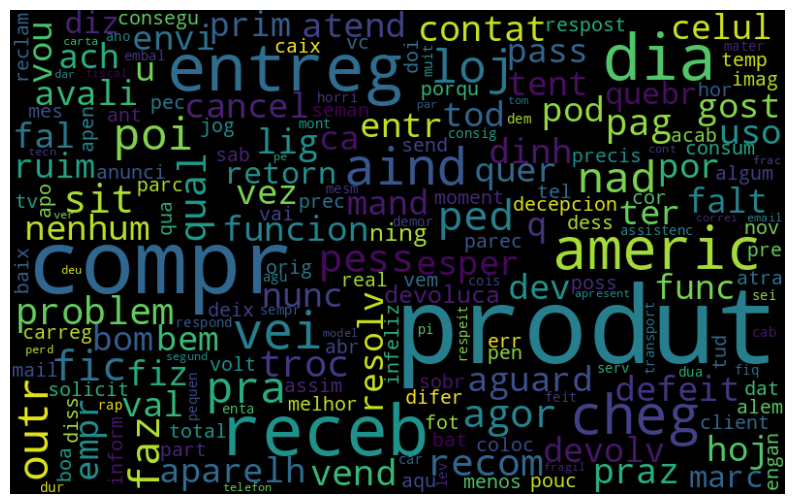

In [ ]:
word_cloud_neg(avaliacoes, "texto_stemmizado")

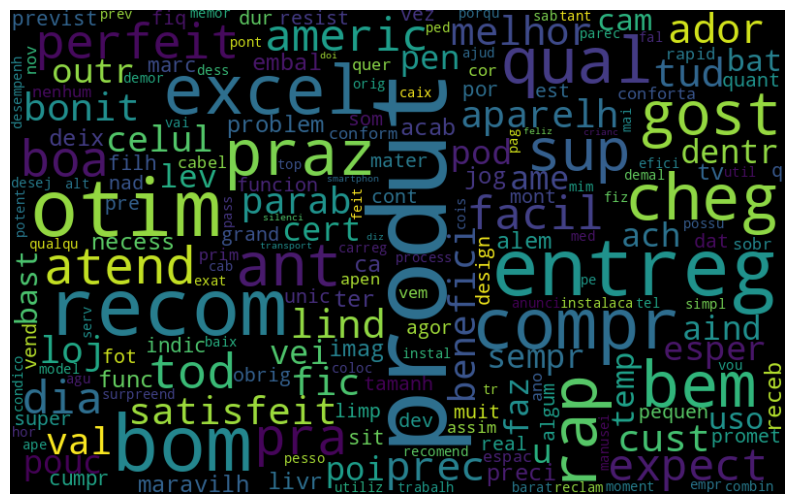

In [ ]:
word_cloud_pos(avaliacoes, "texto_stemmizado")

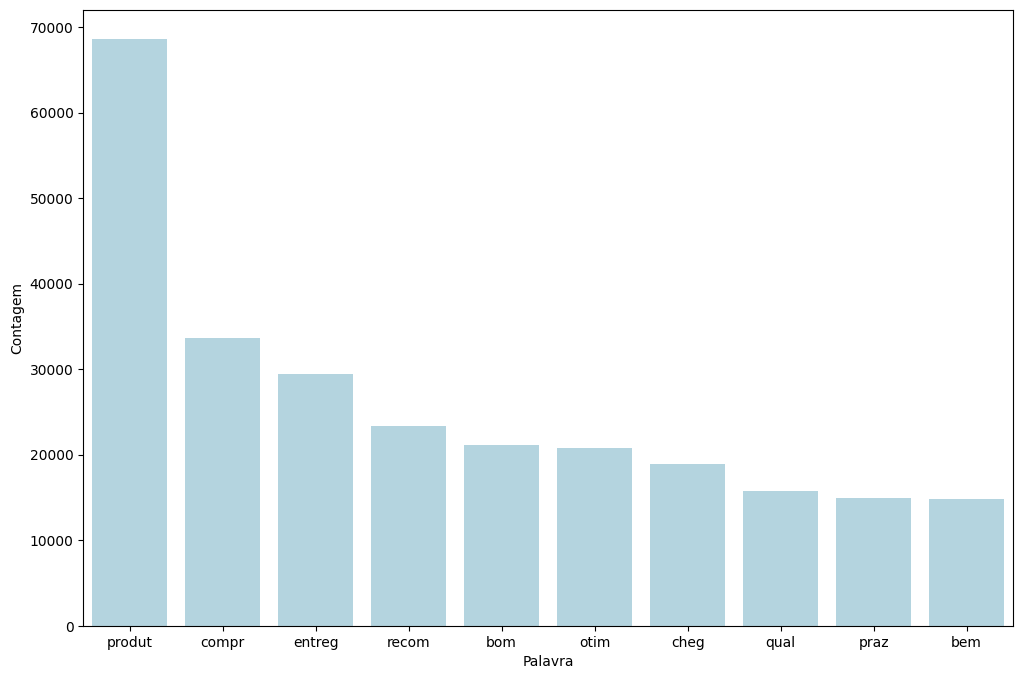

In [ ]:
grafico(avaliacoes, "texto_stemmizado", 10)

# TF IDF

In [ ]:
# Exemplo
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Este produto é muito bom", "Este produto é muito ruim"]
tfidf = TfidfVectorizer(lowercase=False, max_features=100)
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),      # densifica os dados
    columns=tfidf.get_feature_names_out()
)

Este       bom     muito   produto      ruim
0  0.448321  0.630099  0.448321  0.448321  0.000000
1  0.448321  0.000000  0.448321  0.448321  0.630099

In [ ]:
tfidf_tratados = tfidf.fit_transform(avaliacoes.texto_stemmizado)
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state = 71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf

0.8857142857142857

# Ngrams

In [ ]:
# Exemplo
from nltk import ngrams

frase = "Comprei um ótimo produto."
frase_separada = token_por_espaço.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto.')]

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              avaliacoes.polarity,
                                                              random_state = 71)

regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.9360330863346545

In [ ]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              avaliacoes.polarity,
                                                              random_state = 71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf

0.9321385490263657


Analisamos também os pesos que a própria regressão logística monta a partir do TF IDF e vamos ver quais palavras foram mais importantes para a diferenciação de sentenças positivas ou negativas.
        

In [ ]:
pesos = pd.DataFrame(
  regressao_logistica.coef_[0].T,
  index = tfidf.get_feature_names_out()
)

pesos.nlargest(10, 0)     # as palavras positivas

0
otim       15.230469
excel      14.348850
bom         9.841665
perfeit     9.361206
ador        8.810410
satisfeit   7.032137
ame         6.843812
lind        6.784284
rap         6.337588
maravilh    6.275448

In [ ]:
pesos.nsmallest(10, 0)      # as palavras negativas

0
pess        -8.022969
ruim        -6.279744
frac        -6.005969
horri       -5.954503
decepcion   -5.590005
receb       -5.409547
dinh        -5.353658
insatisfeit -4.886113
fragil      -4.797450
devoluca    -4.757417

In [ ]:
pesos.nlargest(60, 0)

0
otim        15.230469
excel       14.348850
bom          9.841665
perfeit      9.361206
ador         8.810410
satisfeit    7.032137
ame          6.843812
lind         6.784284
rap          6.337588
maravilh     6.275448
unic         5.280538
parab        5.253749
sup          5.165239
facil        4.975033
boa          4.956367
bem          4.728656
recom        4.601984
gost         4.438309
surpreend    4.391511
ant          4.345319
top          4.221155
expect       4.103985
amou         4.078382
exat         3.938677
bast         3.734315
rapid        3.721530
feliz        3.674094
facilit      3.559816
obrig        3.422102
show         3.407511
silenci      3.384263
sensac       3.359402
super        3.329259
efici        3.273098
tud          3.243992
util         3.206181
ideal        3.177081
conform      3.162568
necess       3.147792
sempr        3.120742
incri        3.099572
amo          3.033785
bonit        3.020076
praz         3.013802
conhec       2.970932
pen          2.939667
acord        2.933222
exel         2.909481
fantas       2.739120
espetacul    2.726491
aprov        2.713462
tranquil     2.703797
conforta     2.687762
limp         2.548117
melhor       2.512467
cert         2.487656
atend        2.481972
am           2.443462
dentr        2.359993
impression   2.330529